# Latar Belakang

TSA (Transportation Security Administration) merupakan sebuah agensi bagian dari Departemen *Homeland Security* Amerika Serikat yang mempunyai otoritas atas keamanan sistem transportasi baik di dalam, maupun yang berhubungan dengan Amerika Serikat. TSA Mengembangkan banyak kebijakan-kebijakan untuk melindungi sistem transportasi Amerika Serikat. Fokus utama dari TSA sendiri adalah mengenai **keamanan bandara**. TSA bertanggung jawab atas pemeriksaan penumpang dan bagasi di lebih dari 450 bandara di Amerika Serikat. TSA mencatat setiap klaim yang diajukan oleh para pengguna moda transportasi tersebut. Dengan adanya data klaim yang diajukan kepada TSA tersebut, TSA memiliki rekam jejak atas setiap kasus-kasus yang terjadi dan data tersebut dapat digunakan oleh TSA sebagai acuan untuk terus dapat meningkatkan kinerjanya.

# Pernyataan Masalah
Dengan adanya data klaim tersebut TSA ingin mengetahui bandara mana saja yang memiliki jumlah pengajuan klaim terbanyak. Informasi ini dapat membantu TSA dalam mengerucutkan bandara-bandara mana saja yang membutuhkan peningkatan kinerja sistem keamanannya, sehingga dapat mengurangi frekuensi klaim yang diajukan kepada TSA.

Sebagai *data analyst* kita akan berusaha menjawab pertanyaan berikut:

**Bagaimana karakteristik data pengajuan klaim yang dibuat oleh para penumpang?**

Dari pernyataan masalah di atas, saya akan mencoba membedah lebih mendalam kepada beberapa masalah, yaitu:
- Apa saja bandara yang memiliki jumlah pengajuan klaim dengan proporsi cukup besar (di atas rata-rata)?
- Apa tipe klaim yang paling sering dilaporkan oleh penumpang?
- Dimana saja titik yang paling sering terjadi pelaporan klaim tersebut?
- Bagaimana grafik jumlah klaim selama rentang tahun 2002-2015?

# Data
Untuk menjawab pertanyaan di atas, kita akan melakukan analisa terhadap data klaim yang telah dikumpulkan oleh TSA dalam rentang tahun 2002-2015. <br>
Dataset dapat diakses melalui [link ini](https://www.kaggle.com/datasets/terminal-security-agency/tsa-claims-database)

In [286]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Dataset ini berisi informasi terkait, tanggal pengajuan klaim, tanggal terjadinya perkara, data bandara, data maskapai udara, tipe klaim, dan status akhir dari klaim tersebut. Ada 13 kolom di dalam dataset ini, yaitu:
- `Claim Number`: ID unik untuk setiap aduan/klaim
- `Date Received`: Tanggal TSA menerima aduan/klaim tersebut
- `Incident Date`: Tanggal terjadinya kasus/perkara menurut pelapor
- `Airport Code`: ID unik bandara tempat terjadinya klaim
- `Airport Name`: Nama bandara tempat terjadinya klaim
- `Airline Name`: Nama maskapai udara yang digunakan oleh pelapor
- `Claim Type`: Tipe klaim yang diajukan oleh pelapor
- `Claim Site`: Lokasi pelapor mengajukan klaim tersebut
- `Item`: Jenis barang yang dilaporkan oleh pelapor
- `Claim Amount`: Nominal biaya ganti rugi yang diajukan oleh pelapor (dalam Dollar AS)
- `Status`: Status laporan klaim setelah diterima dan diproses oleh TSA
- `Close Amount`: Nominal biaya ganti rugi yang dibayarkan oleh TSA kepada pelapor (dalam Dollar AS)
- `Disposition`: Status akhir (final) dari laporan klaim

In [287]:
df = pd.read_csv('tsa_claims.csv')
display(df.head(), df.tail())

C:\Users\MUHAMMAD RAFI\AppData\Local\Temp\ipykernel_12540\3568672196.py:1: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tsa_claims.csv')


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other; Clothing,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Personal Accessories,-,-,NaN,NaN


## Data Understanding and Cleaning

Sebelum masuk ke dalam tahap analisis data, kita perlu mengenal dan memahami lebih jauh mengenai dataset yang digunakan dalam proses *data understanding*. Dari tahapan ini, kita dapat menggali informasi umum data serta anomali-anomali yang terdapat di dalam data. Di mana anomali tersebut perlu kita tangani lebih lanjut dalam tahapan *data cleaning*. Setiap penanganan data anomali akan disertai dengan justifikasi langkah yang diambil.

In [288]:
# Mengecek informasi general yang terkandung dalam dataset dan tipe data untuk setiap value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


In [289]:
# Mengecek jumlah value kosong di setiap kolom

df.isna().sum()

Claim Number         0
Date Received      263
Incident Date     2183
Airport Code      8524
Airport Name      8524
Airline Name     34374
Claim Type        7913
Claim Site         740
Item              3966
Claim Amount      4043
Status               5
Close Amount     68952
Disposition      72908
dtype: int64

In [290]:
df.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204258,4007,26807,465,485,318,11,6,4704,36117,15,17162,3
top,2013121110011,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


In [291]:
# Melihat data unik di tiap kolom

pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0    Claim Number            204258   
1   Date Received              4007   
2   Incident Date             26807   
3    Airport Code               465   
4    Airport Name               485   
5    Airline Name               318   
6      Claim Type                11   
7      Claim Site                 6   
8            Item              4704   
9    Claim Amount             36117   
10         Status                15   
11   Close Amount             17162   
12    Disposition                 3   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Dari informasi di atas, kita dapat mengambil beberapa insight awal:
* Dataset `tsa_claims` memiliki 204.267 baris dan 13 kolom
* terdapat value kosong pada semua kolom terkecuali kolom `Claim Number`. Value kosong pada kolom tersebut diwakili dengan NaN atau NaT.
* Kolom `Claim Number` berisikan ID unik untuk setiap Claim, oleh karena itu tidak relevan dalam analisis dan pengolahan data, sehingga dapat dihapus.
* Kolom `Date Received` dan `Incident Date` memiliki tipe data object. Namun dari value didalamnya, kolom ini seharusnya berisikan data DateTime, karena terkait dengan waktu.
* Kolom `Claim Amount` dan `Close Amount` memiliki tipe data object. Namun kolom ini tidak relevan dalam proses analisis, sehingga dapat dihapus.
* Terdapat beberapa duplikat value di kolom `Airport Name`, dimana value tersebut berkorelasi dengan value yang sama di dalam kolom `Airport Code`.
* Kolom `Airline Name` harus dilakukan pengecekkan lebih lanjut, karena ada beberapa value yang memiliki kemiripan dalam penulisan.
* Kolom `Item` berisikan barang-barang yang dilaporkan oleh pelapor, namun kolom ini tidak relevan untuk tujuan analisi kita, oleh karena itu dapat dihapus. 
* Kolom `Status` dan `Disposition` berisikan data status proses dari pengajuan klaim tersebut. Oleh karena itu kedua kolom ini tidak relevan dalam analisa, sehingga dapat dihapus.


### Missing Value

In [292]:
# persentase missing value di setiap kolom

df.isna().sum()/df.shape[0]*100

Claim Number      0.000000
Date Received     0.128753
Incident Date     1.068699
Airport Code      4.172970
Airport Name      4.172970
Airline Name     16.827975
Claim Type        3.873851
Claim Site        0.362271
Item              1.941576
Claim Amount      1.979272
Status            0.002448
Close Amount     33.755820
Disposition      35.692501
dtype: float64

<AxesSubplot:>

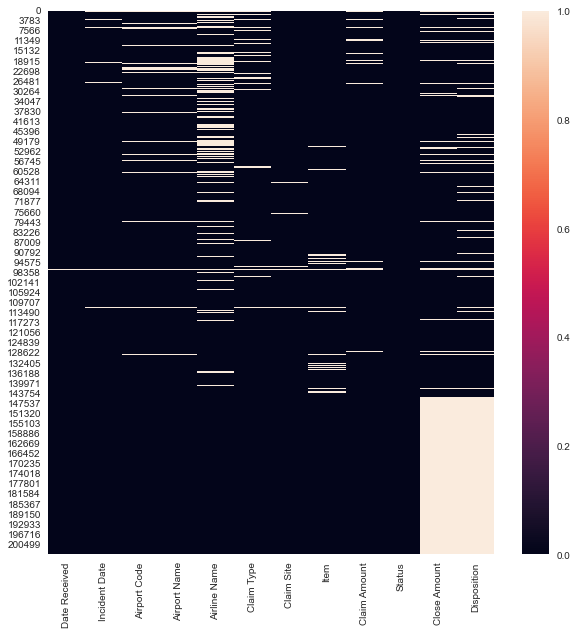

In [293]:
# Sebaran missing value di dalam dataset tsa_claims

plt.figure(figsize=(10,10))
sns.heatmap(df[['Date Received', 'Incident Date','Airport Code','Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item','Claim Amount', 'Status', 'Close Amount', 'Disposition']].isna())

Dari informasi persentase missing value dan tampilan heatmap di atas, informasi yang didapatkan secara garis besar adalah:
* *Missing Value* di kolom `Airline Name`, `Close Amount`, dan `Disposition` memiliki proporsi yang cukup besar (>15%), di mana kolom `Disposition` menjadi yang terbesar dengan persentase *Missing Value* mencapai 35,6%.
* Namun karena data kolom `Close Amount` dan `Disposition` tidak relevan dengan tujuan dari analisis kita, maka kita bisa menghapus kedua kolom tersebut.

Ada 2 opsi yang dapat dilakukan untuk menangani *Missing Value*:
* Opsi pertama dengan menghapus baris atau kolom yang berisi *Missing Value*.
* Opsi kedua dengan mengisi data yang hilang. Cara ini lebih diutamakan dalam kasus ini. Beberapa metode bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi value yang hilang dengan value yang sebenarnya, atau sedekat mungkin nilai asli. Jika masih ada data yang tidak terisi, kita bisa menggunakan angka *mean*, *median*, atau *modus*. Menghapus akan menjadi pilihan terakhir.

#### `Airport Code` dan `Airport Name`
Mengecek lalu menghapus/mengganti *multiple* values di kolom `Airport Name` yang berhubungan dengan satu value yang sama pada kolom `Airport Code`

In [294]:
temp_APcode = df.groupby("Airport Code")['Airport Name'].nunique().sort_values(ascending=False)
print(df[df['Airport Code'].isin(temp_APcode[temp_APcode>1].index)].groupby("Airport Code")['Airport Name'].unique())
print(len(df[df['Airport Code'].isin(temp_APcode[temp_APcode>1].index)].groupby("Airport Code")['Airport Name'].unique()))

Airport Code
BOS          [Boston (Logan) International Airport, Boston (Logan) International Airport ]
BUR                                                                  [Bob Hope, Bob Hope ]
BZN                            [Gallatin Field, Bozeman Yellowstone International Airport]
DEN                          [Denver International Airport, Denver International Airport ]
DFW    [Dallas-Fort Worth International Airport, Dallas-Fort Worth International Airport ]
DUJ                                    [Dubois Jefferson County, Dubois Jefferson County ]
EAR                                [Kearney Municipal Airport, Kearney Municipal Airport ]
HIB                                [Chisolm-Hibbing Municipal, Chisolm-Hibbing Municipal ]
INL                                            [Falls International, Falls International ]
JHM                                                    [Kapalua Airport, Kapalua Airport ]
LAX                [Los Angeles International Airport, Los Angeles Internatio

Dari pengecekkan data di atas, dapat dilihat terdapat 20 value `Airport Code` yang memiliki value `Airport Name` lebih dari satu. Sedangkan seharusnya `Airport Code` menjadi ID unik hanya untuk satu `Airport Name`. Hal ini disebabkan karena adanya spasi berlebih pada salah satu value di `Airport Name`, terkecuali pada **Code PNS** yang disebabkan karena memiliki penulisan value yang berbeda. Kita akan menghilangkan spasi berlebih untuk 19 `Airport Code` dan memilih salah satu penulisan value untuk **Code PNS**

In [295]:
# Menghilangkan spasi berlebih dan memilih satu value Airport Name untuk mewakili Airport Code PNS

df['Airport Code'] = df['Airport Code'].str.strip()
df['Airport Name'] = df['Airport Name'].str.strip()
df['Airport Name'] = df['Airport Name'].replace(to_replace= 'Pensacola Regional', value='Pensacola International Airport')

#### `Airline Name`
Mengecek lebih detail dan mengganti/menyesuaikan beberapa value yang terlihat seperti nama anak/induk perusahaan dan penulisan yang tidak konsisten.

In [296]:
df["Airline Name"] = df['Airline Name'].str.strip().str.replace(" ","")
df.loc[df['Airline Name']== "AmericanEagle", 'Airline Name']="AmericanAirlines"
df.loc[df['Airline Name']=="AmericanWest", 'Airline Name']="AmericaWest"
df.loc[df['Airline Name']=="AirTranAirlines(donotuse)", 'Airline Name']="AirTranAirlines"
df.loc[df['Airline Name']=="AeroflotRussianInternational", 'Airline Name']="AeroFlot"
df.loc[df['Airline Name']=="ContinentalExpressInc", 'Airline Name']="ContinentalAirlines"
df.loc[df['Airline Name']=="Delta(Song)", 'Airline Name']="DeltaAirLines"
df.loc[df['Airline Name']=="FrontierAviationInc", 'Airline Name']="FrontierAirlines"
df.loc[df['Airline Name']=="NorthwestInternationalAirwaysLtd", 'Airline Name']="NorthwestAirlines"
df.loc[df['Airline Name']=="SkywestAirlinesAustralia", 'Airline Name']="SkywestAirlinesIncUSA"

#### `Date Received` dan `Incident Date`
Seluruh kolom di atas masih memiliki tipe data object, namun tipe data tersebut tidak sesuai dengan penjelasan value yang terkandung di dalamnya. Sehingga kita akan merubah tipe data setiap kolom tersebut agar sesuai dengan valuenya.

In [297]:
# Mengubah tipe data yang berkaitan dengan tanggal menjadi DateTime

df['Date Received'] = pd.to_datetime(df['Date Received'])
df['Incident Date'] = pd.to_datetime(df['Incident Date'], errors='coerce')

Pada kolom `Incident Date` terdapat error pada penulisan beberapa value nya sehingga tipe datanya tidak dapat diubah. Kita tidak bisa mengganti/mengisi value tersebut dengan value karena berkaitan dengan waktu yang spesifik.

In [298]:
df['Date Received'].dt.year.value_counts().sort_index()

1994.0        1
1996.0        1
2000.0        4
2002.0     1054
2003.0    22474
2004.0    29786
2005.0    24548
2006.0    19093
2007.0    18672
2008.0    16440
2009.0    12803
2010.0    10925
2011.0    10905
2012.0    10069
2013.0     9698
2014.0     8855
2015.0     8667
2020.0        1
2025.0        5
2040.0        1
2044.0        1
2055.0        1
Name: Date Received, dtype: int64

In [299]:
df['Incident Date'].dt.year.value_counts().sort_index()

1996.0        1
2000.0       14
2001.0       15
2002.0     2156
2003.0    24508
2004.0    28960
2005.0    22965
2006.0    18806
2007.0    18270
2008.0    15902
2009.0    11179
2010.0    12215
2011.0    10995
2012.0     9997
2013.0     9536
2014.0     8680
2015.0     7721
Name: Incident Date, dtype: int64

Dari pengecekkan di atas ditemukan bahwa terdapat value yang memiliki penanggalan (tahun) tidak sesuai dengan pernyataan rentang tahun dataset (2002-2015). Oleh karena itu kita akan menghapus value penanggalan (tahun) yang tidak sesuai tersebut, langkah ini dapat diambil karena proporsi value keliru tersebut termasuk sangat rendah dan tidak ada cara yang dianggap cukup sesuai untuk mengganti value tersebut.

In [300]:
# Mengatur rentang tahun data yang digunakan sesuai dengan informasi tentang rentang tahun dataset (2002-2015)

df = df[df['Date Received'].dt.year.isin(range(2002,2015+1))]
df = df[df['Incident Date'].dt.year.isin(range(2002,2015+1))]

Setelah pengecekan lebih jauh, diketahui terdapat ambiguitas pada beberapa value yang terdapat dalam kedua kolom tersebut.  Kolom `Date Received` berisikan waktu pembuatan **Claim** (laporan) dan kolom `Incident Date` berisikan waktu terjadinya kasus (perkara), maka menjadi tidak masuk akal atau bias apabila value di dalam `Incident Date` berisikan waktu yang lebih baru dibandingkan dengan value yang terdapat di dalam `Date Received`. Oleh karena itu kita akan menghapus setiap data yang terdapat ambiguitas tersebut.

In [301]:
# Menghapus setiap index data dengan kondisi waktu 'Incident Date' lebih baru dibanding waktu 'Date Received'

indeks = df[df['Incident Date'] > df['Date Received']].index
df.drop(index=indeks, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$75.00,Approved,$75.00,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,$4;457.29,Denied,NaN,Deny
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),$16.71,Approved,$17.00,Approve in Full
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,$450.00,Canceled,NaN,NaN


In [302]:
df.shape

(200026, 13)

In [303]:
df.isna().sum()

Claim Number         0
Date Received        0
Incident Date        0
Airport Code      6940
Airport Name      6940
Airline Name     32028
Claim Type        6327
Claim Site         515
Item              3683
Claim Amount      2501
Status               0
Close Amount     67345
Disposition      71011
dtype: int64

In [304]:
df.isna().sum()/df.shape[0]*100

Claim Number      0.000000
Date Received     0.000000
Incident Date     0.000000
Airport Code      3.469549
Airport Name      3.469549
Airline Name     16.011918
Claim Type        3.163089
Claim Site        0.257467
Item              1.841261
Claim Amount      1.250337
Status            0.000000
Close Amount     33.668123
Disposition      35.500885
dtype: float64

- Dari informasi di atas, diketahui masih banyak terdapat data kosong di dalam beberapa kolom, kecuali kolom `Date Received` dan `Incident Date`.
- Missing value dari kolom `Item`, `Status`, `Disposition`, `Claim Amount`, dan `Close Amount` akan kita hiraukan karena nanti seluruh kolom tersebut akan dihapus. 
- Kolom `Airport Code`, `Airport Name`, `Airline Name`, `Claim Type`, dan `Claim Site` merupakan data kategorikal. Sehingga kita bisa menangani missing value pada data tersebut dengan membuat kategori sendiri sebagai "**Other**"

In [305]:
df.isna().sum()

Claim Number         0
Date Received        0
Incident Date        0
Airport Code      6940
Airport Name      6940
Airline Name     32028
Claim Type        6327
Claim Site         515
Item              3683
Claim Amount      2501
Status               0
Close Amount     67345
Disposition      71011
dtype: int64

Di sini kita mengganti missing value kolom `Claim Type`, `Claim Site`, dan `Item` dengan kategori ***Other***.

In [306]:
df[['Claim Type', 'Claim Site']] = df[['Claim Type', 'Claim Site']].fillna('Other')

In [307]:
df[['Claim Type', 'Claim Site']].isna().sum()

Claim Type    0
Claim Site    0
dtype: int64

Berikutnya kita akan mengganti value (**-**) pada kolom `Claim Type` dan `Claim Site` dengan ***Other*** untuk menyamakan kategori datanya sehingga tidak menimbulkan bias.

In [308]:
df['Claim Type'].value_counts()

Passenger Property Loss    116386
Property Damage             74232
Other                        6327
Personal Injury              1456
Employee Loss (MPCECA)        477
Passenger Theft               451
Motor Vehicle                 368
-                             274
Complaint                      47
Wrongful Death                  4
Compliment                      3
Bus Terminal                    1
Name: Claim Type, dtype: int64

In [309]:
df.loc[df['Claim Type'] =='-', 'Claim Type'] = 'Other'

In [310]:
df['Claim Type'].value_counts()

Passenger Property Loss    116386
Property Damage             74232
Other                        6601
Personal Injury              1456
Employee Loss (MPCECA)        477
Passenger Theft               451
Motor Vehicle                 368
Complaint                      47
Wrongful Death                  4
Compliment                      3
Bus Terminal                    1
Name: Claim Type, dtype: int64

In [311]:
df['Claim Site'].value_counts()

Checked Baggage    157558
Checkpoint          39537
Other                2178
Motor Vehicle         472
-                     265
Bus Station            16
Name: Claim Site, dtype: int64

In [312]:
df.loc[df['Claim Site'] =='-', 'Claim Site'] = 'Other'

In [313]:
df['Claim Site'].value_counts()

Checked Baggage    157558
Checkpoint          39537
Other                2443
Motor Vehicle         472
Bus Station            16
Name: Claim Site, dtype: int64

In [314]:
df.isna().sum()/df.shape[0]*100

Claim Number      0.000000
Date Received     0.000000
Incident Date     0.000000
Airport Code      3.469549
Airport Name      3.469549
Airline Name     16.011918
Claim Type        0.000000
Claim Site        0.000000
Item              1.841261
Claim Amount      1.250337
Status            0.000000
Close Amount     33.668123
Disposition      35.500885
dtype: float64

Sekarang masih tersisa missing value pada kolom `Airport Code`, `Airport Name`, dan `Airline Name`. Ketiga kolom tersebut berisikan data kategorik. Kita akan menangani data kosong sebagai berikut:
- Tidak ada cara yang cukup meyakinkan dan baik untuk mengisi `Airport Code` dan `Airport Name`, serta kedua kolom tersebut berelasi satu sama lain.
- Kita akan mengisi missing value `Airline Name` dengan kategori ***Undisclosed*** dengan asumsi pelapor tidak menyatakan nama maskapai ketika mengajukan klaim kepada TSA. Pengisisan dengan cara ini dilakukan dikarenakan tidak ada cara yang cukup baik untuk menentukan nama maskapai disebabkan arus lalu lintas atau jadwal penerbangan yang cukup random di setiap bandara.

In [315]:
df.dropna(subset=['Airport Code', 'Airport Name'], inplace=True)

In [316]:
df[['Airport Code', 'Airport Name']].isna().sum()

Airport Code    0
Airport Name    0
dtype: int64

In [317]:
#Mengisi missing value Airline Name dengan kategori Undisclosed

df['Airline Name'] = df['Airline Name'].fillna('Undisclosed')

In [318]:
# Menyederhanakan value '-' dalam Airline Name agar masuk ke dalam kategori Undisclosed

df.loc[df['Airline Name'] == '-', 'Airline Name']='Undisclosed'

In [319]:
df['Airline Name'].isna().sum()

0

#### Claim Number, Claim Amount, Close Amount, Status, dan Disposition
Kelima kolom di atas memiliki data yang tidak relevan tujuan dari analisis kita dan bisa dihapus saja.

In [320]:
df.drop(columns=['Claim Number', 'Claim Amount', 'Close Amount', 'Status', 'Disposition', 'Item'], inplace=True)

In [321]:
df.isna().sum()

Date Received    0
Incident Date    0
Airport Code     0
Airport Name     0
Airline Name     0
Claim Type       0
Claim Site       0
dtype: int64

## Cleaned Data
Kita sudah selesai dalam tahapan *data cleaning*, berikut adalah informasi general dari data yang sudah dibersihkan

In [322]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(193086, 7)


,dataFeatures,dataType,null,unique,uniqueSample
0,Date Received,datetime64[ns],0,3894,"[2012-11-11T00:00:00.000000000, 2003-03-14T00:00:00.000000000]"
1,Incident Date,datetime64[ns],0,26182,"[2009-01-17T00:00:00.000000000, 2012-06-04T17:15:00.000000000]"
2,Airport Code,object,0,465,"[SPS, ATW]"
3,Airport Name,object,0,466,"[Jacksonville International, Yakutat]"
4,Airline Name,object,0,224,"[SantaBarbaraAirlines, JALwaysAirlines]"
5,Claim Type,object,0,11,"[Employee Loss (MPCECA), Passenger Property Loss]"
6,Claim Site,object,0,5,"[Motor Vehicle, Checkpoint]"


Sebelum proses *data cleaning*, dataset kita memiliki 204.267 baris dan 13 kolom. Sekarang dataset tersebut memiliki 193.086 baris dan 8 kolom. Sekitar 11.000 ribu data yang kosong dihapus, dan sisa data kosong diisi dengan value yang dirasa relevan.

# Data Analysis
Kita sudah selesai melakukan proses *data cleaning*. Berikutnya kita mulai melakukan analisis untuk mencari tahu **Bandara dengan jumlah aduan klaim terbanyak** dan **Bagaimana karakteristik klaim yang diajukan di setiap Bandara**

In [323]:
airport = df['Airport Code'].value_counts()
print("Total: {} Airports, {} Claims".format(airport.count(),airport.sum()))

Total: 465 Airports, 193086 Claims


Diketahui terdapat 453 aiports dengan total 193.086 ribu claims. Berikutnya kita akan melihat jumlah masing-masing tipe klaim yang diajukan oleh pelapor berdasarkan lokasi bandara dan lokasi tempat klaim tersebut dilaporkan di bandara tersebut. Kita akan menganalisis kolom `Date Received`, `Airport Code`, `Claim Type`, dan `Claim Site` untuk menjawab pertanyaan:
- Bagaimana grafik Total Klaim tiap tahunnya (2002-2015)?
- Berapa total klaim yang diajukan kepada setiap bandara?
- Bandara mana saja yang menerima klaim paling banyak?
- Tipe klaim apa saja yang paling banyak diajukan di setiap bandara tersebut?
- Dimana saja lokasi yang paling sering terjadi pelaporan klaim di dalam bandara tersebut?

#### Total Klaim berdasarkan Rentang Tahun 2002-2015

In [324]:
df['Year'] = df['Date Received'].dt.year
df.head()

,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Year
0,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,2002
1,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Undisclosed,Property Damage,Checkpoint,2002
2,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Undisclosed,Passenger Property Loss,Checkpoint,2002
3,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,2002
4,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,2002


In [325]:
claimPerYear = df.groupby('Year', as_index=False)['Airport Code'].count()
claimPerYear

,Year,Airport Code
0,2002,837
1,2003,17287
2,2004,27246
3,2005,23481
4,2006,18477
5,2007,18201
6,2008,16132
7,2009,12559
8,2010,10807
9,2011,10819


In [326]:
claimPerYear.describe()

,Year,Airport Code
count,14.0000,14.000000
mean,2008.5000,13791.857143
std,4.1833,6809.016927
min,2002.0000,837.000000
25%,2005.2500,9764.500000
50%,2008.5000,11689.000000
75%,2011.7500,17972.500000
max,2015.0000,27246.000000


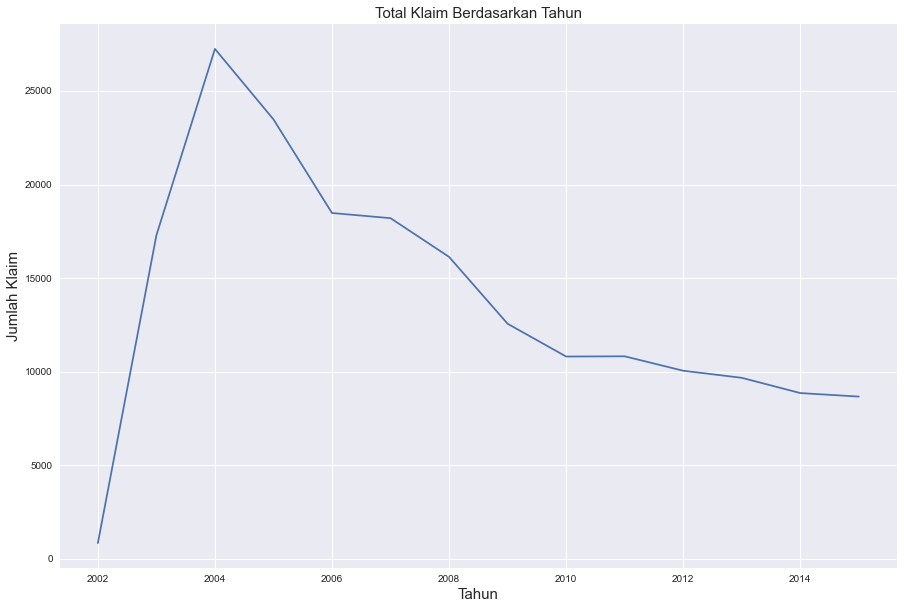

In [327]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
plt.plot(claimPerYear['Year'], claimPerYear['Airport Code'])
plt.title('Total Klaim Berdasarkan Tahun', size=15)
plt.xlabel('Tahun', size=15)
plt.ylabel('Jumlah Klaim', size=15)
plt.show()

Dari grafik di atas terlihat bahwa tahun 2002 memiliki klaim paling sedikit dikarenakan data yang tersedia pada tahun tersebut tergolong cukup rendah. Namun terdapat lonjakan cukup tajam pada tahun 2004, lalu setelah tahun 2008 grafik cenderung menurun.

### Jumlah Klaim yang Diterima Oleh Setiap Bandara (Di Atas Rata-rata)

In [328]:
claimbyairport = df.groupby('Airport Code', as_index=False)['Claim Type'].count()
claimbyairport.rename(columns={'Claim Type':'Total Claim'}, inplace=True)
claimbyairport

,Airport Code,Total Claim
0,-,421
1,ABE,127
2,ABI,44
3,ABQ,926
4,ABR,31
...,...,...
460,YKM,44
461,YNG,24
462,YUM,32
463,ZZX,249


In [329]:
claimbyairport.describe()

,Total Claim
count,465.000000
mean,415.238710
std,1159.785286
min,1.000000
25%,7.000000
50%,33.000000
75%,187.000000
max,9451.000000


<AxesSubplot:xlabel='Total Claim'>

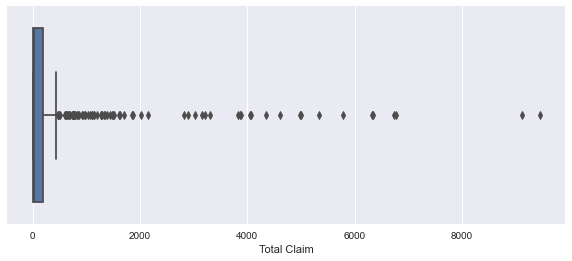

In [330]:
plt.figure(figsize = (10, 4))
sns.boxplot(x = claimbyairport['Total Claim'])

In [331]:
Q1 = 7.0
Q3 = 162.0
IQR = Q3 - Q1
upper_bound =  Q3 + (1.5 * IQR)

claimbyairport[claimbyairport['Total Claim']> upper_bound]['Airport Code'].count()

83

In [332]:
# Uji Distribusi normal Total Claim menggunakan kstest

'''
*) If the P-Value is larger than 0.05, we assume a normal distribution
*) If the P-Value is smaller than 0.05, we do not assume a normal distribution
'''

from scipy.stats import kstest

print(kstest(claimbyairport['Total Claim'], 'norm'))

KstestResult(statistic=0.9105832013851541, pvalue=0.0)


Dari grafik dan uji distribusi normal data di atas diketahui bahwa Total Claim tidak terdistribusi dengan normal dan standar deviasi yang cukup besar dari total klaim yang diterima oleh tiap bandara. Hal ini dikarenakan dengan banyaknya *outlier* dan cukup besarnya nilai dari *outlier* tersebut. Terdapat 79 bandara yang termasuk ke dalam nilai *outlier*. Kita tidak akan menghapus data ini karena fokus dari analisa ini sendiri lebih tertuju kepada bandara yang memiliki total klaim yang jauh lebih banyak diantara bandara lainnya, karena hal itu menjadikan bandara-bandara tersebut sebagai prioritas untuk segera ditindaklanjuti lebih jauh oleh TSA. Oleh karena itu kita akan menganalisa lebih jauh bandara-bandara yang masuk ke dalam nilai outlier tersebut.

In [333]:
t_airport = claimbyairport[claimbyairport['Total Claim']> upper_bound]

In [334]:
t_airport_mean = t_airport['Total Claim'].mean()

Di sini kita akan lebih mengerucutkan analisa kita kepada bandara yang memiliki total klaim di atas rata-rata (berdasarkan data *outlier*)

In [335]:
t_plot = t_airport[t_airport['Total Claim'] > t_airport_mean].sort_values('Total Claim', ascending=False)
t_plot

,Airport Code,Total Claim
246,LAX,9451
232,JFK,9122
138,EWR,6769
321,ORD,6738
288,MIA,6336
276,MCO,6323
28,ATL,5792
398,SEA,5344
339,PHX,4994
244,LAS,4991


In [336]:
t_plot.describe()

,Total Claim
count,24.000000
mean,4795.375000
std,1900.918469
min,2150.000000
25%,3280.250000
50%,4209.500000
75%,5924.750000
max,9451.000000


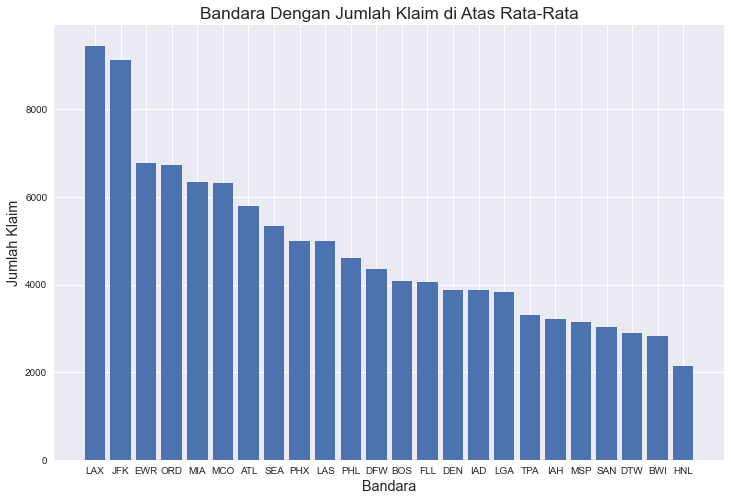

In [337]:
plt.style.use('seaborn')
plt.figure(figsize=(12, 8))
plt.title('Bandara Dengan Jumlah Klaim di Atas Rata-Rata', size='xx-large') 
plt.bar(t_plot['Airport Code'], t_plot['Total Claim'])
plt.xlabel('Bandara', size='x-large')
plt.ylabel('Jumlah Klaim', size='x-large')
plt.show()

Dari grafik di atas terlihat setiap bandara dengan total klaim di atas rata-rata (berdasarkan bandara yang termasuk ke dalam *outlier*), tiga tertinggi diantara bandara tersebut masing-masing adalah LAX (9.451 klaim), JFK (9.122 klaim), dan ORD (6.769 klaim). Berdasarkan data yang dilansir oleh [Airports Council International](https://aci.aero/2022/04/11/the-top-10-busiest-airports-in-the-world-revealed/) dan [Wikipedia](https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States#2016), diketahui bahwa mayoritas dari bandara-bandara yang masuk ke dalam grafik di atas juga termasuk ke dalam bandara-bandara tersibuk di Amerika Serikat.

Maka akan sangat wajar apabila kemungkinan terjadinya pengajuan klaim di bandara-bandara tersebut lebih tinggi, dikarenakan tingginya arus lalu lintas penumpang dan cukup tingginya beban kerja yang harus dilaksanakan oleh TSA.

In [338]:
df['Claim Type'].value_counts()/df.shape[0]*100

Passenger Property Loss    58.924003
Property Damage            36.727676
Other                       2.929265
Personal Injury             0.739049
Employee Loss (MPCECA)      0.242897
Passenger Theft             0.230985
Motor Vehicle               0.177641
Complaint                   0.024341
Wrongful Death              0.002072
Compliment                  0.001554
Bus Terminal                0.000518
Name: Claim Type, dtype: float64

In [339]:
claimType = df.groupby('Claim Type', as_index=False)['Claim Type'].value_counts()
claimType

,Claim Type,count
0,Bus Terminal,1
1,Complaint,47
2,Compliment,3
3,Employee Loss (MPCECA),469
4,Motor Vehicle,343
5,Other,5656
6,Passenger Property Loss,113774
7,Passenger Theft,446
8,Personal Injury,1427
9,Property Damage,70916


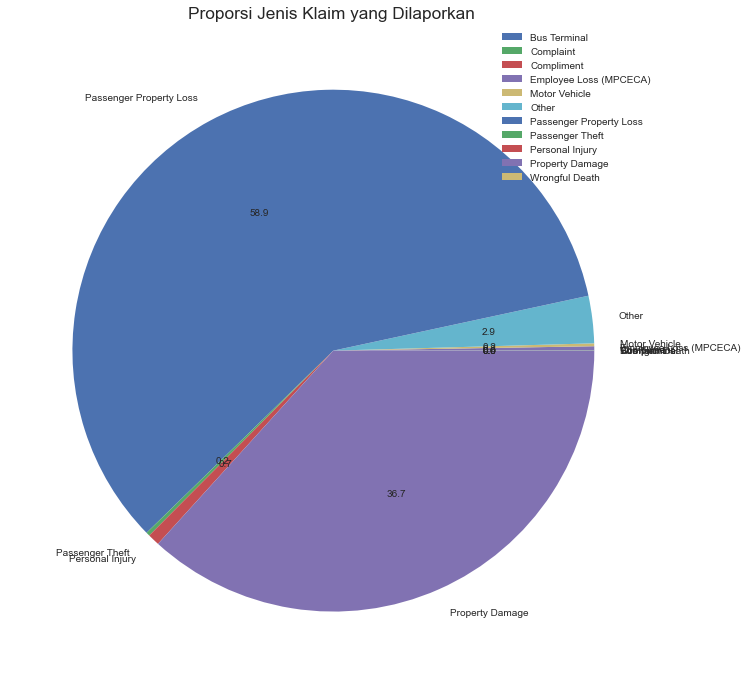

In [340]:
plt.style.use('seaborn')
plt.figure(figsize=(12,12))
plt.title('Proporsi Jenis Klaim yang Dilaporkan ', size='xx-large') 
plt.pie(claimType['count'], labels=claimType['Claim Type'], autopct='%.1f')
plt.legend()
plt.show()

In [341]:
df['Claim Site'].value_counts()/df.shape[0]*100

Checked Baggage    78.961188
Checkpoint         19.799468
Other               1.004734
Motor Vehicle       0.226842
Bus Station         0.007769
Name: Claim Site, dtype: float64

In [342]:
claimSite = df.groupby('Claim Site', as_index=False)['Claim Site'].value_counts()
claimSite

,Claim Site,count
0,Bus Station,15
1,Checked Baggage,152463
2,Checkpoint,38230
3,Motor Vehicle,438
4,Other,1940


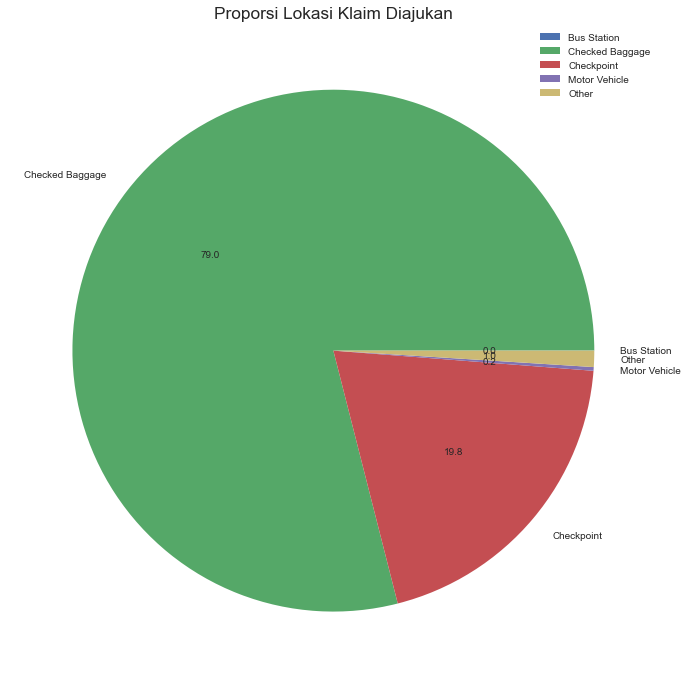

In [343]:
plt.style.use('seaborn')
plt.figure(figsize=(12,12))
plt.title('Proporsi Lokasi Klaim Diajukan', size='xx-large') 
plt.pie(claimSite['count'], labels=claimSite['Claim Site'], autopct='%.1f')
plt.legend()
plt.show()

Dari informasi di atas diketahui bahwa mayoritas tipe klaim yang diajukan kepada TSA berupa ***Passenger Property Loss*** dan ***Property Damage***, masing-masing sebesar **58,9%** dan **36,7%**. Data ini mengindikasikan bahwa kebanyakkan klaim yang diajukan kepada TSA bersangkutan dengan barang-barang yang dibawa oleh penumpang. Dengan mayoritas lokasi titik pengaduan klaim berada di ***Checked Baggage*** dan ***Checkpoint***, masing-masing sebesar **79%** dan **19,8%**.

Dari proporsi tersebut kita dapat menarik kesimpulan bahwa tingginya proporsi pengaduan klaim di titik ***Checked Baggage*** (Pengecekkan Bagasi) dan ***Checkpoint*** (Tempat pemeriksaan penumpang di bandara) disebabkan karena dua lokasi tersebut merupakan titik dengan tingkat aktivitas dan tingkat kepadatan yang cukup tinggi di sebuah bandara.

#### Proporsi Jumlah Tipe Klaim berdasarkan Bandara

In [344]:
# 10 Bandara dengan jumlah pengajuan klaim terbanyak, berdasarkan Claim Type

df_CT=pd.crosstab(df['Airport Code'],df['Claim Type'])
df_CT['Total']=df_CT.sum(axis=1)
top10CT = df_CT.sort_values('Total',ascending=False).head(10)

In [345]:
top10CT

Claim Type,Bus Terminal,Complaint,Compliment,Employee Loss (MPCECA),Motor Vehicle,Other,Passenger Property Loss,Passenger Theft,Personal Injury,Property Damage,Wrongful Death,Total
Airport Code,,,,,,,,,,,,
LAX,0,2,0,21,9,366,5738,24,64,3227,0,9451
JFK,0,2,0,13,9,210,6272,17,52,2547,0,9122
EWR,0,2,0,20,5,200,4260,15,36,2231,0,6769
ORD,0,0,0,24,6,202,3636,20,33,2817,0,6738
MIA,0,1,0,19,6,220,3889,13,36,2152,0,6336
MCO,0,2,0,14,4,183,4013,12,51,2044,0,6323
ATL,0,1,0,9,3,132,3530,16,44,2057,0,5792
SEA,0,1,0,16,0,178,3093,19,26,2011,0,5344
PHX,0,4,0,11,0,155,2913,14,48,1849,0,4994


In [346]:
top10CT.describe()

Claim Type,Bus Terminal,Complaint,Compliment,Employee Loss (MPCECA),Motor Vehicle,Other,Passenger Property Loss,Passenger Theft,Personal Injury,Property Damage,Wrongful Death,Total
count,10.0,10.00000,10.0,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.0,10.000000
mean,0.0,1.70000,0.0,15.700000,4.400000,197.800000,4050.600000,16.50000,43.800000,2255.500000,0.0,6586.000000
std,0.0,1.05935,0.0,5.121849,3.238655,66.714649,1120.365635,3.62859,11.143508,479.397365,0.0,1566.286195
min,0.0,0.00000,0.0,9.000000,0.000000,132.000000,2913.000000,12.00000,26.000000,1620.000000,0.0,4991.000000
25%,0.0,1.00000,0.0,11.500000,2.250000,160.750000,3254.000000,14.25000,36.000000,2019.250000,0.0,5456.000000
50%,0.0,2.00000,0.0,15.000000,4.500000,191.500000,3762.500000,15.50000,46.000000,2104.500000,0.0,6329.500000
75%,0.0,2.00000,0.0,19.750000,6.000000,208.000000,4198.250000,18.50000,50.250000,2468.000000,0.0,6761.250000
max,0.0,4.00000,0.0,24.000000,9.000000,366.000000,6272.000000,24.00000,64.000000,3227.000000,0.0,9451.000000


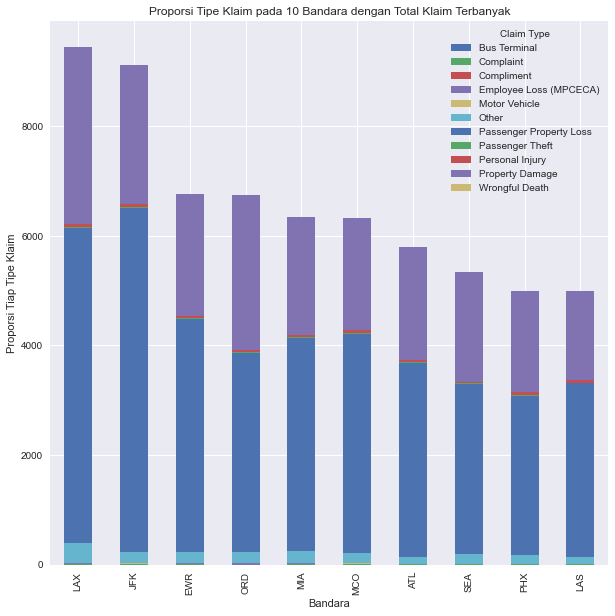

In [347]:
top10CT.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(10,10), title='Proporsi Tipe Klaim pada 10 Bandara dengan Total Klaim Terbanyak', xlabel='Bandara', ylabel='Proporsi Tiap Tipe Klaim')
plt.show()

Senada dengan informasi yang telah kita dapatkan dari pie chart yang sebelumnya, pada bar chart di atas kita dapat melihat bahwa tipe klaim ***Passenger Property Loss*** dan ***Property Damage*** menjadi tipe klaim dengan proporsi terbanyak di 10 bandara dengan dengan total claim terbanyak.

#### Proporsi Jumlah Lokasi Klaim berdasarkan Bandara

In [348]:
# 10 Bandara dengan jumlah pengajuan klaim terbanyak, berdasarkan Claim Site

df_CS=pd.crosstab(df['Airport Code'],df['Claim Site'])
df_CS['Total']=df_CS.sum(axis=1)
top10CS = df_CS.sort_values('Total',ascending=False).head(10)

In [349]:
top10CS

Claim Site,Bus Station,Checked Baggage,Checkpoint,Motor Vehicle,Other,Total
Airport Code,,,,,,
LAX,1,7180,2153,8,109,9451
JFK,2,7138,1882,9,91,9122
EWR,2,5548,1138,7,74,6769
ORD,1,5315,1336,8,78,6738
MIA,0,5319,960,5,52,6336
MCO,0,4957,1309,3,54,6323
ATL,1,4454,1287,2,48,5792
SEA,0,4310,991,2,41,5344
PHX,0,4107,843,0,44,4994


In [350]:
top10CS.describe()

Claim Site,Bus Station,Checked Baggage,Checkpoint,Motor Vehicle,Other,Total
count,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,0.700000,5224.900000,1291.900000,4.400000,64.10000,6586.000000
std,0.823273,1157.424771,420.554779,3.438346,22.79108,1566.286195
min,0.000000,3921.000000,843.000000,0.000000,41.00000,4991.000000
25%,0.000000,4346.000000,998.250000,2.000000,48.50000,5456.000000
50%,0.500000,5136.000000,1212.500000,4.000000,53.00000,6329.500000
75%,1.000000,5490.750000,1329.250000,7.750000,77.00000,6761.250000
max,2.000000,7180.000000,2153.000000,9.000000,109.00000,9451.000000


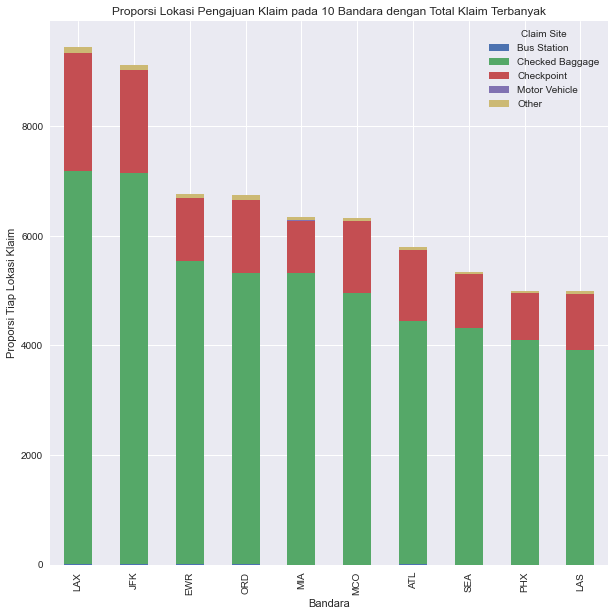

In [351]:
top10CS.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(10,10), title='Proporsi Lokasi Pengajuan Klaim pada 10 Bandara dengan Total Klaim Terbanyak', xlabel='Bandara', ylabel='Proporsi Tiap Lokasi Klaim')
plt.show()

Begitu pula dengan lokasi klaim ***Checked Baggage*** dan ***Checkpoint*** yang pada pie chart sebelumnya menjadi lokasi klaim dengan proporsi terbanyak , dari bar chart di atas kedua lokasi tersebut juga turut memiliki proporsi terbanyak di 10 bandara dengan dengan total claim terbanyak.

Namun hal menarik yang perlu diperhatikan adalah mengenai ***Checked Baggage***. Karena selain ditangani oleh TSA, ***Checked Baggage*** juga ditangani oleh tiap maskapai penerbangan. Oleh karena itu kita akan mengecek maskapai penerbangan dengan laporan ***Checked Baggage*** cukup tinggi.

#### Total klaim *Checked Baggage* berdasarkan maskapai

In [352]:
# 10 Maskapai dengan klaim Checked Baggage terbanyak

df_airline=pd.crosstab(df['Airline Name'],df['Claim Site'])
df_airline.sort_values('Checked Baggage',ascending=False)

Claim Site,Bus Station,Checked Baggage,Checkpoint,Motor Vehicle,Other
Airline Name,,,,,
DeltaAirLines,1,20595,4610,0,170
Undisclosed,0,19688,10419,432,872
AmericanAirlines,1,19532,3931,0,139
UAL,4,16223,3037,1,156
SouthwestAirlines,3,15995,4102,0,121
...,...,...,...,...,...
ViequesAir,0,0,1,0,0
EstoniaAir,0,0,1,0,0
ArikaIsrealiAirlines,0,0,1,0,1


In [353]:
df_airline.drop(columns=['Bus Station', 'Checkpoint', 'Motor Vehicle', 'Other'], inplace=True)

In [354]:
df_airline.describe()

Claim Site,Checked Baggage
count,224.000000
mean,680.638393
std,2960.688517
min,0.000000
25%,3.000000
50%,11.000000
75%,66.000000
max,20595.000000


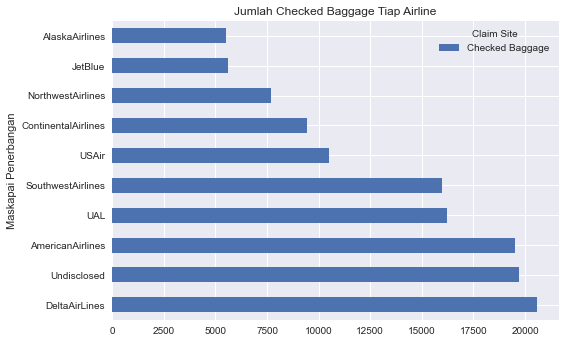

In [355]:
airline_plot = df_airline.sort_values('Checked Baggage', ascending=False).head(10)
airline_plot.plot(kind='barh', title='Jumlah Checked Baggage Tiap Airline', xlabel='Maskapai Penerbangan', ylabel='Jumlah Klaim Checked Baggage')
plt.show()

Berdasarkan informasi yang dilansir oleh [YouGovAmerica](https://today.yougov.com/ratings/travel/popularity/airlines/all), hampir seluruh maskapai yang masuk ke dalam grafik di atas merupakan maskapai dengan tingkat popularitas tertinggi di Amerika Serikat. Tingginya jumlah ***Checked Baggage*** bisa juga disebabkan karena maskapai-maskapai tersebut adalah maskapai yang paling sering digunakan oleh warga AS, maka belum tentu kelalaian yang menyebabkan klaim tersebut berasal dari TSA, namun bisa juga disebabkan oleh kelalaian dari maskapai itu sendiri.

## Kesimpulan dan Rekomendasi

### Kesimpulan

Dari analisis yang telah dilakukan, kita dapat menarik beberapa kesimpulan mengenai **bagaimana karekteristik data pengajuan klaim pada rentang tahun 2002-2015** sebagai berikut:

1. Bandara LAX (Los Angeles International Airport) menjadi bandara dengan total klaim tertinggi, diikuti oleh Bandara JFK (John F. Kennedy International Airport) dan bandara ORD (Chicago O'Hare International Airport).

2. Mayoritas bandara yang memiliki total klaim di atas rata-rata, termasuk ke dalam bandara-bandara tersibuk di Amerika Serikat.

3. Tipe klaim *Passenger Property Loss* dan *Property Damage* menjadi tipe klaim dengan proporsi terbanyak. Kedua tipe klaim itu pun tetap menjadi yang terbanyak ketika dicek berdasarkan jumlah tiap tipe klaim di setiap bandara.

4. Lokasi claim *Checked Baggage* dan *Checkpoint* menjadi lokasi klaim dengan proporsi terbanyak. Hal ini disebabkan karena kedua titik tersebut merupakan titik dengan tingkat aktivitas dan kepadatan tertinggi di suatu bandara. Namun perlu diperhatikan untuk *Checked Baggage*, maskapai penerbangan juga turut andil selama barang tersebut berada di dalam pesawat.

5. Mayoritas maskapai yang memiliki jumlah klaim *Checked Baggage* terbanyak turut masuk ke dalam maskapai terpopuler (sering digunakan) di AS.

6. Tahun 2002 menjadi tahun dengan data klaim terendah, dengan lonjakan cukup tinggi ada pada tahun 2004 dan total klaim cenderung menurun pada tahun-tahun berikutnya.

### Rekomendasi atau Saran:

Berikut adalah beberapa rekomendasi yang dapat diberikan berdasarkan kesimpulan di atas:

1. TSA dapat menambah petugas keamanan untuk bandara-bandara yang termasuk ke dalam bandara dengan arus lalu lintas tersibuk di AS.

2. TSA perlu lebih memperhatikan atau jika perlu menambah petugas pada titik *Checked Baggage* dan *Checkpoint* di setiap bandara.

3. TSA perlu menjalin kerjasama atau berkomunikasi mengenai keamanan barang-barang yang dibawa oleh penumpang dengan maskapai-maskapai yang terkait.

In [356]:
#claimPerYear.to_excel('ClaimPerYear.xlsx')
#t_plot.to_excel('Klaim_per_Bandara.xlsx')
#claimType.to_excel('ProporsiClaimType.xlsx')
#claimSite.to_excel('ProporsiClaimSite.xlsx')
#airline_plot.to_excel('AirlinePlot.xlsx')
#top10CS.to_excel('Top10ClaimSite.xlsx')
#top10CT.to_excel('Top10ClaimType.xlsx')